<a href="https://colab.research.google.com/github/NaraGuimma/mentoria_dados/blob/main/Ocorrencias_Aeronauticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fonte de dados:**

- página do governo dos dados abertos: https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas

- CSV zipado: https://sistemas.anac.gov.br/dadosabertos/Seguranca%20Operacional/Ocorrencia/V_OCORRENCIA_AMPLA.csv

- metadados: https://www.gov.br/anac/pt-br/acesso-a-informacao/dados-abertos/areas-de-atuacao/seguranca-operacional/ocorrencias-aeronauticas/metadados-do-conjunto-de-dados-ocorrencias-aeronauticas

**Objetivos**

1. Entender como os tipos de ocorrencias variaram ao longo dos anos
2. Analisar a tipos de danos causados nas aeronaves para os diferentes tipos de ocorrencias registradas
3. Identificar as regiões com as maiores quantidades de ocorrencias registradas aos longo dos anos
4. Analise ao longo dos anos as pessoas que foram direta ou indiretamente envolvidas nessas ocorrencias por região do país

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

Lendo nosso arquivo csv e criando um dataframe com o mesmo

In [3]:
df_raw_ocorrencias_aeronauticas = pd.read_csv('V_OCORRENCIA_AMPLA.csv', sep=';', encoding='UTF-8', skiprows=1)
df_raw_ocorrencias_aeronauticas.head(3)

,Numero_da_Ocorrencia,Numero_da_Ficha,Operador_Padronizado,Classificacao_da_Ocorrencia,Data_da_Ocorrencia,Hora_da_Ocorrencia,Municipio,UF,Regiao,Descricao_do_Tipo,...,Lesoes_Desconhecidas_Tripulantes,Lesoes_Desconhecidas_Passageiros,Lesoes_Desconhecidas_Terceiros,Modelo,CLS,Tipo_ICAO,PMD,Numero_de_Assentos,Nome_do_Fabricante,PSSO
0,35306,199603122243205,MOACIR UGHINI T.AEREO INDIVIDUAL,Acidente,1996-03-12,13:40:00,TRAMANDAÍ,RS,Sul,NaN,...,NaN,NaN,NaN,182G,L1P,C182,1270.0,4.0,CESSNA AIRCRAFT,verdadeiro
1,37747,202341344266,FERMAC CARGO CONSULTORIA E ASSESSORIA EM TRANS...,Incidente Grave,2023-06-15,13:10:00,POUSO ALEGRE,MG,Sudeste,EXCURSÃO DE PISTA,...,NaN,NaN,NaN,RV-10,L1P,ZZZZ,1224.0,4.0,FLYER INDUSTRIA AERONAUTICA LTDA,verdadeiro
2,38382,202362976253,SAGRES TÁXI AÉREO LTDA,Acidente,2023-08-16,15:40:00,LARANJAL DO JARI,AP,Norte,FALHA OU MAU FUNCIONAMENTO DO MOTOR,...,NaN,NaN,NaN,EC 120 B,H1T,EC20,1715.0,5.0,EUROCOPTER FRANCE,verdadeiro


Analisando o tamanho do nosso dataset

In [10]:
df_raw_ocorrencias_aeronauticas.shape

(5021, 45)

Verificando o tipo das colunas

In [9]:
df_raw_ocorrencias_aeronauticas.dtypes

,0
Numero_da_Ocorrencia,int64
Numero_da_Ficha,object
Operador_Padronizado,object
Classificacao_da_Ocorrencia,object
Data_da_Ocorrencia,object
Hora_da_Ocorrencia,object
Municipio,object
UF,object
Regiao,object
Descricao_do_Tipo,object


Verificando a existencia de dados nulos

In [11]:
df_raw_ocorrencias_aeronauticas.isnull().sum()

,0
Numero_da_Ocorrencia,0
Numero_da_Ficha,2
Operador_Padronizado,76
Classificacao_da_Ocorrencia,0
Data_da_Ocorrencia,0
Hora_da_Ocorrencia,1433
Municipio,1394
UF,3
Regiao,670
Descricao_do_Tipo,642


Fazendo um describe das colunas numéricas

In [4]:
df_raw_ocorrencias_aeronauticas.describe()

,Numero_da_Ocorrencia,Lesoes_Fatais_Tripulantes,Lesoes_Fatais_Passageiros,Lesoes_Fatais_Terceiros,Lesoes_Graves_Tripulantes,Lesoes_Graves_Passageiros,Lesoes_Graves_Terceiros,Lesoes_Leves_Tripulantes,Lesoes_Leves_Passageiros,Lesoes_Leves_Terceiros,Ilesos_Tripulantes,Ilesos_Passageiros,Lesoes_Desconhecidas_Tripulantes,Lesoes_Desconhecidas_Passageiros,Lesoes_Desconhecidas_Terceiros,PMD,Numero_de_Assentos
count,5021.000000,3903.000000,3782.000000,3702.000000,3853.000000,3740.000000,3694.000000,3897.000000,3744.000000,3694.000000,4611.000000,4072.000000,3706.000000,3695.000000,3694.000000,4876.000000,4872.000000
mean,12814.381000,0.222649,0.313326,0.018639,0.089022,0.068717,0.006226,0.168335,0.152511,0.008121,0.907612,3.232564,0.015111,0.017050,0.003249,3528.873052,7.507594
std,13129.158692,0.504088,3.947276,0.267946,0.308442,0.397013,0.091408,0.435693,0.735700,0.118384,1.053106,17.857695,0.138581,0.230302,0.093029,13279.101698,23.691526
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4529.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1043.000000,2.000000
50%,6532.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1633.000000,4.000000
75%,25190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2155.000000,6.000000
max,46147.000000,6.000000,181.000000,12.000000,2.000000,6.000000,2.000000,5.000000,18.000000,4.000000,16.000000,341.000000,2.000000,7.000000,4.000000,346544.000000,399.000000


Mostrando apenas as colunas com valores categóricos



In [5]:
df_categorical_data_columns = df_raw_ocorrencias_aeronauticas.select_dtypes(include=['object', 'category'])
df_categorical_data_columns.columns

Index(['Numero_da_Ficha', 'Operador_Padronizado',
       'Classificacao_da_Ocorrencia', 'Data_da_Ocorrencia',
       'Hora_da_Ocorrencia', 'Municipio', 'UF', 'Regiao', 'Descricao_do_Tipo',
       'ICAO', 'Latitude', 'Longitude', 'Tipo_de_Aerodromo', 'Historico',
       'Matricula', 'Categoria_da_Aeronave', 'Operador', 'Tipo_de_Ocorrencia',
       'Fase_da_Operacao', 'Operacao', 'Danos_a_Aeronave',
       'Aerodromo_de_Destino', 'Aerodromo_de_Origem', 'Modelo', 'CLS',
       'Tipo_ICAO', 'Nome_do_Fabricante', 'PSSO'],
      dtype='object')

Mostrando apenas as colunas com valores numéricos

In [12]:
df_numerical_data_columns_exc = df_raw_ocorrencias_aeronauticas.select_dtypes(exclude=['object', 'category'])
df_numerical_data_columns_exc.columns

Index(['Numero_da_Ocorrencia', 'Lesoes_Fatais_Tripulantes',
       'Lesoes_Fatais_Passageiros', 'Lesoes_Fatais_Terceiros',
       'Lesoes_Graves_Tripulantes', 'Lesoes_Graves_Passageiros',
       'Lesoes_Graves_Terceiros', 'Lesoes_Leves_Tripulantes',
       'Lesoes_Leves_Passageiros', 'Lesoes_Leves_Terceiros',
       'Ilesos_Tripulantes', 'Ilesos_Passageiros',
       'Lesoes_Desconhecidas_Tripulantes', 'Lesoes_Desconhecidas_Passageiros',
       'Lesoes_Desconhecidas_Terceiros', 'PMD', 'Numero_de_Assentos'],
      dtype='object')

In [8]:
df_numerical_data_columns = df_raw_ocorrencias_aeronauticas.drop(df_raw_ocorrencias_aeronauticas.select_dtypes(include=['object', 'category']).columns, axis=1)
df_numerical_data_columns.columns

Index(['Numero_da_Ocorrencia', 'Lesoes_Fatais_Tripulantes',
       'Lesoes_Fatais_Passageiros', 'Lesoes_Fatais_Terceiros',
       'Lesoes_Graves_Tripulantes', 'Lesoes_Graves_Passageiros',
       'Lesoes_Graves_Terceiros', 'Lesoes_Leves_Tripulantes',
       'Lesoes_Leves_Passageiros', 'Lesoes_Leves_Terceiros',
       'Ilesos_Tripulantes', 'Ilesos_Passageiros',
       'Lesoes_Desconhecidas_Tripulantes', 'Lesoes_Desconhecidas_Passageiros',
       'Lesoes_Desconhecidas_Terceiros', 'PMD', 'Numero_de_Assentos'],
      dtype='object')

In [73]:
df_categorical_data_columns.head(5)

,Numero_da_Ficha,Operador_Padronizado,Classificacao_da_Ocorrencia,Data_da_Ocorrencia,Hora_da_Ocorrencia,Municipio,UF,Regiao,Descricao_do_Tipo,ICAO,...,Fase_da_Operacao,Operacao,Danos_a_Aeronave,Aerodromo_de_Destino,Aerodromo_de_Origem,Modelo,CLS,Tipo_ICAO,Nome_do_Fabricante,PSSO
0,199603122243205,MOACIR UGHINI T.AEREO INDIVIDUAL,Acidente,1996-03-12,13:40:00,TRAMANDAÍ,RS,Sul,NaN,Fora de Aeródromo,...,NaN,NaN,NaN,NaN,NaN,182G,L1P,C182,CESSNA AIRCRAFT,verdadeiro
1,202341344266,FERMAC CARGO CONSULTORIA E ASSESSORIA EM TRANS...,Incidente Grave,2023-06-15,13:10:00,POUSO ALEGRE,MG,Sudeste,EXCURSÃO DE PISTA,SNZA,...,Pouso,Voo Privado,Leve,SNZA,SDAM,RV-10,L1P,ZZZZ,FLYER INDUSTRIA AERONAUTICA LTDA,verdadeiro
2,202362976253,SAGRES TÁXI AÉREO LTDA,Acidente,2023-08-16,15:40:00,LARANJAL DO JARI,AP,Norte,FALHA OU MAU FUNCIONAMENTO DO MOTOR,Fora de Aeródromo,...,Cruzeiro,Voo não regular,Substancial,SBMQ,SDK2,EC 120 B,H1T,EC20,EUROCOPTER FRANCE,verdadeiro
3,202187487,JOÃO GUSTAVO BATISTA CORREA,Acidente,2021-03-31,14:00,TANGARÁ DA SERRA,MT,Centro-Oeste,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SWTS,...,Decolagem,Voo Experimental,Destruída,SWKC,SWTS,EXPLORER,L1P,ZZZZ,INPAER - Indústria Paulista de Partes e,verdadeiro
4,2022131779,POLICIA MILITAR DE MINAS GERAIS,Incidente Grave,2022-01-19,19:50,BELO HORIZONTE,MG,Sudeste,EXCURSÃO DE PISTA,SBBH,...,Corrida após pouso,Operação Pública,Leve,SBVG,SBBH,C90,L2T,BE9L,BEECH AIRCRAFT,verdadeiro


Criando uma coluna com o mes e ano da ocorrência

In [74]:
df_raw_ocorrencias_aeronauticas['Mes_Ano_da_Ocorrencia'] = pd.to_datetime(df_raw_ocorrencias_aeronauticas['Data_da_Ocorrencia']).dt.strftime('%Y-%m-01')
df_raw_ocorrencias_aeronauticas.head()

,Numero_da_Ocorrencia,Numero_da_Ficha,Operador_Padronizado,Classificacao_da_Ocorrencia,Data_da_Ocorrencia,Hora_da_Ocorrencia,Municipio,UF,Regiao,Descricao_do_Tipo,...,Lesoes_Desconhecidas_Passageiros,Lesoes_Desconhecidas_Terceiros,Modelo,CLS,Tipo_ICAO,PMD,Numero_de_Assentos,Nome_do_Fabricante,PSSO,Mes_Ano_da_Ocorrencia
0,35306,199603122243205,MOACIR UGHINI T.AEREO INDIVIDUAL,Acidente,1996-03-12,13:40:00,TRAMANDAÍ,RS,Sul,NaN,...,NaN,NaN,182G,L1P,C182,1270.0,4.0,CESSNA AIRCRAFT,verdadeiro,1996-03-01
1,37747,202341344266,FERMAC CARGO CONSULTORIA E ASSESSORIA EM TRANS...,Incidente Grave,2023-06-15,13:10:00,POUSO ALEGRE,MG,Sudeste,EXCURSÃO DE PISTA,...,NaN,NaN,RV-10,L1P,ZZZZ,1224.0,4.0,FLYER INDUSTRIA AERONAUTICA LTDA,verdadeiro,2023-06-01
2,38382,202362976253,SAGRES TÁXI AÉREO LTDA,Acidente,2023-08-16,15:40:00,LARANJAL DO JARI,AP,Norte,FALHA OU MAU FUNCIONAMENTO DO MOTOR,...,NaN,NaN,EC 120 B,H1T,EC20,1715.0,5.0,EUROCOPTER FRANCE,verdadeiro,2023-08-01
3,27703,202187487,JOÃO GUSTAVO BATISTA CORREA,Acidente,2021-03-31,14:00,TANGARÁ DA SERRA,MT,Centro-Oeste,FALHA OU MAU FUNCIONAMENTO DO MOTOR,...,NaN,NaN,EXPLORER,L1P,ZZZZ,1500.0,4.0,INPAER - Indústria Paulista de Partes e,verdadeiro,2021-03-01
4,31110,2022131779,POLICIA MILITAR DE MINAS GERAIS,Incidente Grave,2022-01-19,19:50,BELO HORIZONTE,MG,Sudeste,EXCURSÃO DE PISTA,...,NaN,NaN,C90,L2T,BE9L,4763.0,8.0,BEECH AIRCRAFT,verdadeiro,2022-01-01


Criando uma coluna com apenas o ano da ocorrência

In [75]:
df_raw_ocorrencias_aeronauticas["Ano_da_Ocorrencia"] = pd.to_datetime(
    df_raw_ocorrencias_aeronauticas["Mes_Ano_da_Ocorrencia"]
).dt.year.astype(int)
df_raw_ocorrencias_aeronauticas.head(5)

,Numero_da_Ocorrencia,Numero_da_Ficha,Operador_Padronizado,Classificacao_da_Ocorrencia,Data_da_Ocorrencia,Hora_da_Ocorrencia,Municipio,UF,Regiao,Descricao_do_Tipo,...,Lesoes_Desconhecidas_Terceiros,Modelo,CLS,Tipo_ICAO,PMD,Numero_de_Assentos,Nome_do_Fabricante,PSSO,Mes_Ano_da_Ocorrencia,Ano_da_Ocorrencia
0,35306,199603122243205,MOACIR UGHINI T.AEREO INDIVIDUAL,Acidente,1996-03-12,13:40:00,TRAMANDAÍ,RS,Sul,NaN,...,NaN,182G,L1P,C182,1270.0,4.0,CESSNA AIRCRAFT,verdadeiro,1996-03-01,1996
1,37747,202341344266,FERMAC CARGO CONSULTORIA E ASSESSORIA EM TRANS...,Incidente Grave,2023-06-15,13:10:00,POUSO ALEGRE,MG,Sudeste,EXCURSÃO DE PISTA,...,NaN,RV-10,L1P,ZZZZ,1224.0,4.0,FLYER INDUSTRIA AERONAUTICA LTDA,verdadeiro,2023-06-01,2023
2,38382,202362976253,SAGRES TÁXI AÉREO LTDA,Acidente,2023-08-16,15:40:00,LARANJAL DO JARI,AP,Norte,FALHA OU MAU FUNCIONAMENTO DO MOTOR,...,NaN,EC 120 B,H1T,EC20,1715.0,5.0,EUROCOPTER FRANCE,verdadeiro,2023-08-01,2023
3,27703,202187487,JOÃO GUSTAVO BATISTA CORREA,Acidente,2021-03-31,14:00,TANGARÁ DA SERRA,MT,Centro-Oeste,FALHA OU MAU FUNCIONAMENTO DO MOTOR,...,NaN,EXPLORER,L1P,ZZZZ,1500.0,4.0,INPAER - Indústria Paulista de Partes e,verdadeiro,2021-03-01,2021
4,31110,2022131779,POLICIA MILITAR DE MINAS GERAIS,Incidente Grave,2022-01-19,19:50,BELO HORIZONTE,MG,Sudeste,EXCURSÃO DE PISTA,...,NaN,C90,L2T,BE9L,4763.0,8.0,BEECH AIRCRAFT,verdadeiro,2022-01-01,2022


In [76]:
df_raw_ocorrencias_aeronauticas['Descricao_do_Tipo'].unique()

array([nan, 'EXCURSÃO DE PISTA', 'FALHA OU MAU FUNCIONAMENTO DO MOTOR',
       'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE',
       'PERDA DE CONTROLE EM VOO', 'OPERAÇÃO A BAIXA ALTITUDE',
       'PERDA DE CONTROLE NO SOLO', 'INDETERMINADO', 'OUTROS',
       'REBOQUE DE PLANADOR', 'CONTATO ANORMAL COM A PISTA',
       'MANOBRA ABRUPTA', 'VOO CONTROLADO CONTRA O TERRENO',
       'POUSO AQUÉM/ALÉM DA PISTA',
       'COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO',
       'IMC NÃO INTENCIONAL', 'RELACIONADO COM SECURITY',
       'CORTANTE DE VENTO / TEMPESTADE', 'COMBUSTÍVEL', 'COLISÃO COM AVE',
       'PERDA DE SEPARAÇÃO / COLISÃO EM VOO', 'OPERAÇÕES NO SOLO',
       'COM CARGAS EXTERNAS', 'COLISÃO NO SOLO', 'INCURSÃO EM PISTA',
       'EVACUAÇÃO', 'FOGO/FUMAÇA', 'AERÓDROMO', 'COLISÃO COM FAUNA',
       'LOST OF LIFTING CONDITIONS EN-ROUTE', 'MÉDICO', 'TURBULÊNCIA',
       'FIRE/SMOKE (POST-IMPACT)', 'FORMAÇÃO DE GELO',
       'GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE

In [77]:
df_raw_ocorrencias_aeronauticas['Operacao'].unique()

array([nan, 'Voo Privado', 'Voo não regular', 'Voo Experimental',
       'Operação Pública', 'Operação Especializada', 'Operação Agrícola',
       'Táxi Aéreo', 'Voo de Instrução', 'Desconhecida',
       'Operação Policial', 'Voo Regular', 'Operação Militar'],
      dtype=object)

In [78]:
df_raw_ocorrencias_aeronauticas['Fase_da_Operacao'].unique()

array([nan, 'Pouso', 'Cruzeiro', 'Decolagem', 'Corrida após pouso',
       'Circuto de Tráfego', 'Manobra', 'Voo a baixa altura',
       'Indeterminada', 'Outras', 'Descida', 'Subida', 'Aproximação',
       'Arremetida', 'Táxi', 'Procedimento de Aproximação',
       'Partida do motor', 'Pairado', 'Procedimento IFR', 'Em rota',
       'Especializada', 'Estacionamento', 'Cheque de motor ou rotor',
       'Reta Final', 'Operação de Solo', 'Saída IFR',
       'Corrida de decolagem', 'Emprego Segurança Pública'], dtype=object)

In [79]:
df_raw_ocorrencias_aeronauticas['Danos_a_Aeronave'].unique()

array([nan, 'Leve', 'Substancial', 'Destruída', 'Nenhum', 'Desconhecida'],
      dtype=object)

In [80]:
df_raw_ocorrencias_aeronauticas['Classificacao_da_Ocorrencia'].unique()

array(['Acidente', 'Incidente Grave'], dtype=object)

De acordo com a ANAC (https://www.gov.br/anac/pt-br/assuntos/seguranca-operacional/gerenciamento-da-seguranca-operacional/arquivos/sistema_01.pdf)

Na aviação, um incidente grave é uma ocorrência que quase resulta em um acidente, enquanto um acidente é uma ocorrência que resulta em danos ou lesões.


**Incidente grave:**
- Ocorre quando há circunstâncias que indicam uma alta probabilidade de um acidente
- É uma ocorrência que não se caracteriza como um acidente, mas que pode afetar a segurança da operação

**Acidente:**
- Ocorre quando alguém sofre lesões graves ou morre em decorrência de sua presença na aeronave
- Ocorre quando há exposição direta ao sopro de hélice, rotor ou escapamento de jato


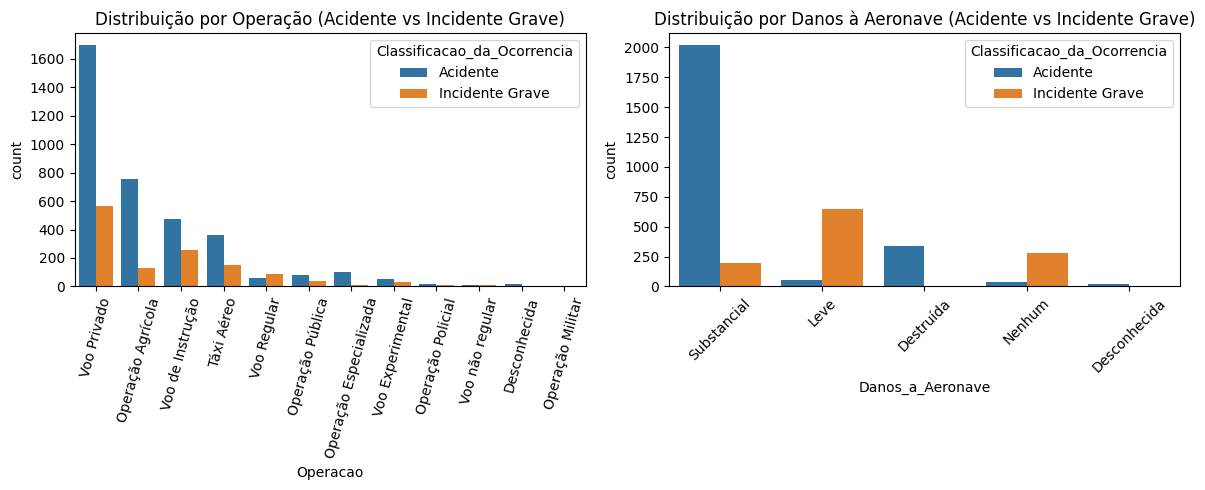

In [81]:
# Análise de distribuições comparando pela Classificacao_da_Ocorrencia
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Distribuição por Operação
sns.countplot(data=df_raw_ocorrencias_aeronauticas, x="Operacao", hue="Classificacao_da_Ocorrencia",
              ax=axes[0], order=df_raw_ocorrencias_aeronauticas["Operacao"].value_counts().index)
axes[0].set_title("Distribuição por Operação (Acidente vs Incidente Grave)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)

# Gráfico 2: Distribuição por Danos à Aeronave
sns.countplot(data=df_raw_ocorrencias_aeronauticas, x="Danos_a_Aeronave", hue="Classificacao_da_Ocorrencia",
              ax=axes[1], order=df_raw_ocorrencias_aeronauticas["Danos_a_Aeronave"].value_counts().index)
axes[1].set_title("Distribuição por Danos à Aeronave (Acidente vs Incidente Grave)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Ajustando layout
plt.tight_layout()
plt.show()


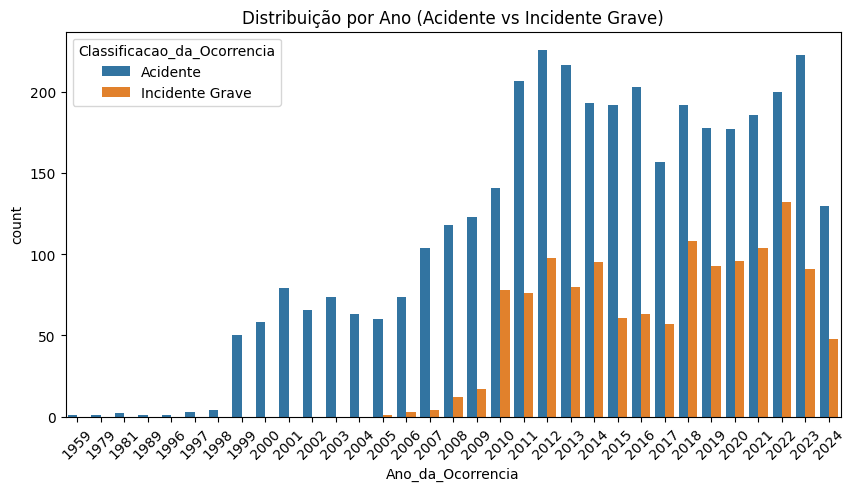

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico 3: Distribuição por Ano
sns.countplot(data=df_raw_ocorrencias_aeronauticas, x="Ano_da_Ocorrencia", hue="Classificacao_da_Ocorrencia",
              ax=ax)
ax.set_title("Distribuição por Ano (Acidente vs Incidente Grave)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Exibir gráfico
plt.show()

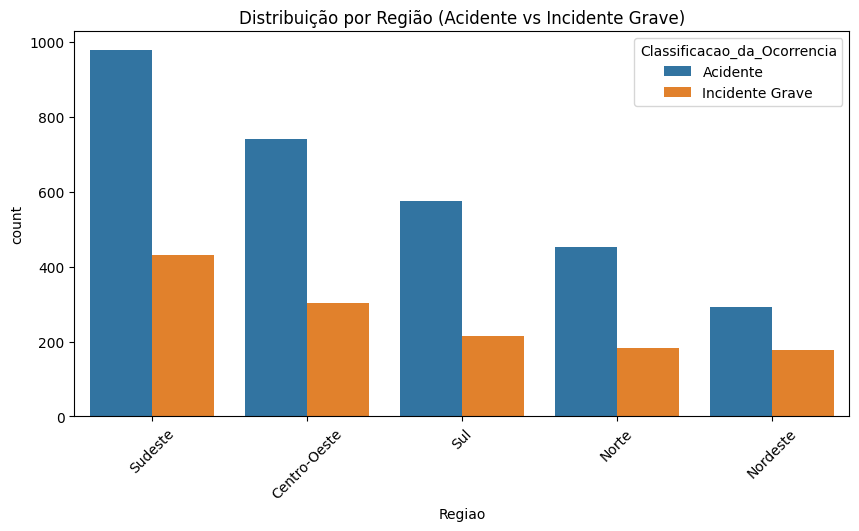

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico 4: Distribuição por Região
sns.countplot(data=df_raw_ocorrencias_aeronauticas, x="Regiao", hue="Classificacao_da_Ocorrencia",
              ax=ax, order=df_raw_ocorrencias_aeronauticas["Regiao"].value_counts().index)
ax.set_title("Distribuição por Região (Acidente vs Incidente Grave)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Exibir gráfico
plt.show()

In [85]:
df_sudeste = df_raw_ocorrencias_aeronauticas[df_raw_ocorrencias_aeronauticas['Regiao'] == 'Sudeste']
df_sudeste.head()

,Numero_da_Ocorrencia,Numero_da_Ficha,Operador_Padronizado,Classificacao_da_Ocorrencia,Data_da_Ocorrencia,Hora_da_Ocorrencia,Municipio,UF,Regiao,Descricao_do_Tipo,...,Lesoes_Desconhecidas_Terceiros,Modelo,CLS,Tipo_ICAO,PMD,Numero_de_Assentos,Nome_do_Fabricante,PSSO,Mes_Ano_da_Ocorrencia,Ano_da_Ocorrencia
1,37747,202341344266,FERMAC CARGO CONSULTORIA E ASSESSORIA EM TRANS...,Incidente Grave,2023-06-15,13:10:00,POUSO ALEGRE,MG,Sudeste,EXCURSÃO DE PISTA,...,NaN,RV-10,L1P,ZZZZ,1224.0,4.0,FLYER INDUSTRIA AERONAUTICA LTDA,verdadeiro,2023-06-01,2023
4,31110,2022131779,POLICIA MILITAR DE MINAS GERAIS,Incidente Grave,2022-01-19,19:50,BELO HORIZONTE,MG,Sudeste,EXCURSÃO DE PISTA,...,NaN,C90,L2T,BE9L,4763.0,8.0,BEECH AIRCRAFT,verdadeiro,2022-01-01,2022
5,31110,2022131779,POLICIA MILITAR DE MINAS GERAIS,Incidente Grave,2022-01-19,19:50,BELO HORIZONTE,MG,Sudeste,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,...,NaN,C90,L2T,BE9L,4763.0,8.0,BEECH AIRCRAFT,verdadeiro,2022-01-01,2022
14,27504,202197801,NOVA AVIAÇÃO AGRÍCOLA LTDA,Acidente,2021-03-13,12:57,CONQUISTA,MG,Sudeste,FALHA OU MAU FUNCIONAMENTO DO MOTOR,...,NaN,AT-502B,L1T,AT5T,3629.0,1.0,AIR TRACTOR,verdadeiro,2021-03-01,2021
17,27983,202123446,AGD AVIATION ESCOLA DE AVIACAO CIVIL LTD,Acidente,2021-05-03,16:30,SÃO PAULO,SP,Sudeste,PERDA DE CONTROLE EM VOO,...,NaN,R22,H1P,R22,621.0,2.0,ROBINSON HELICOPTER,verdadeiro,2021-05-01,2021


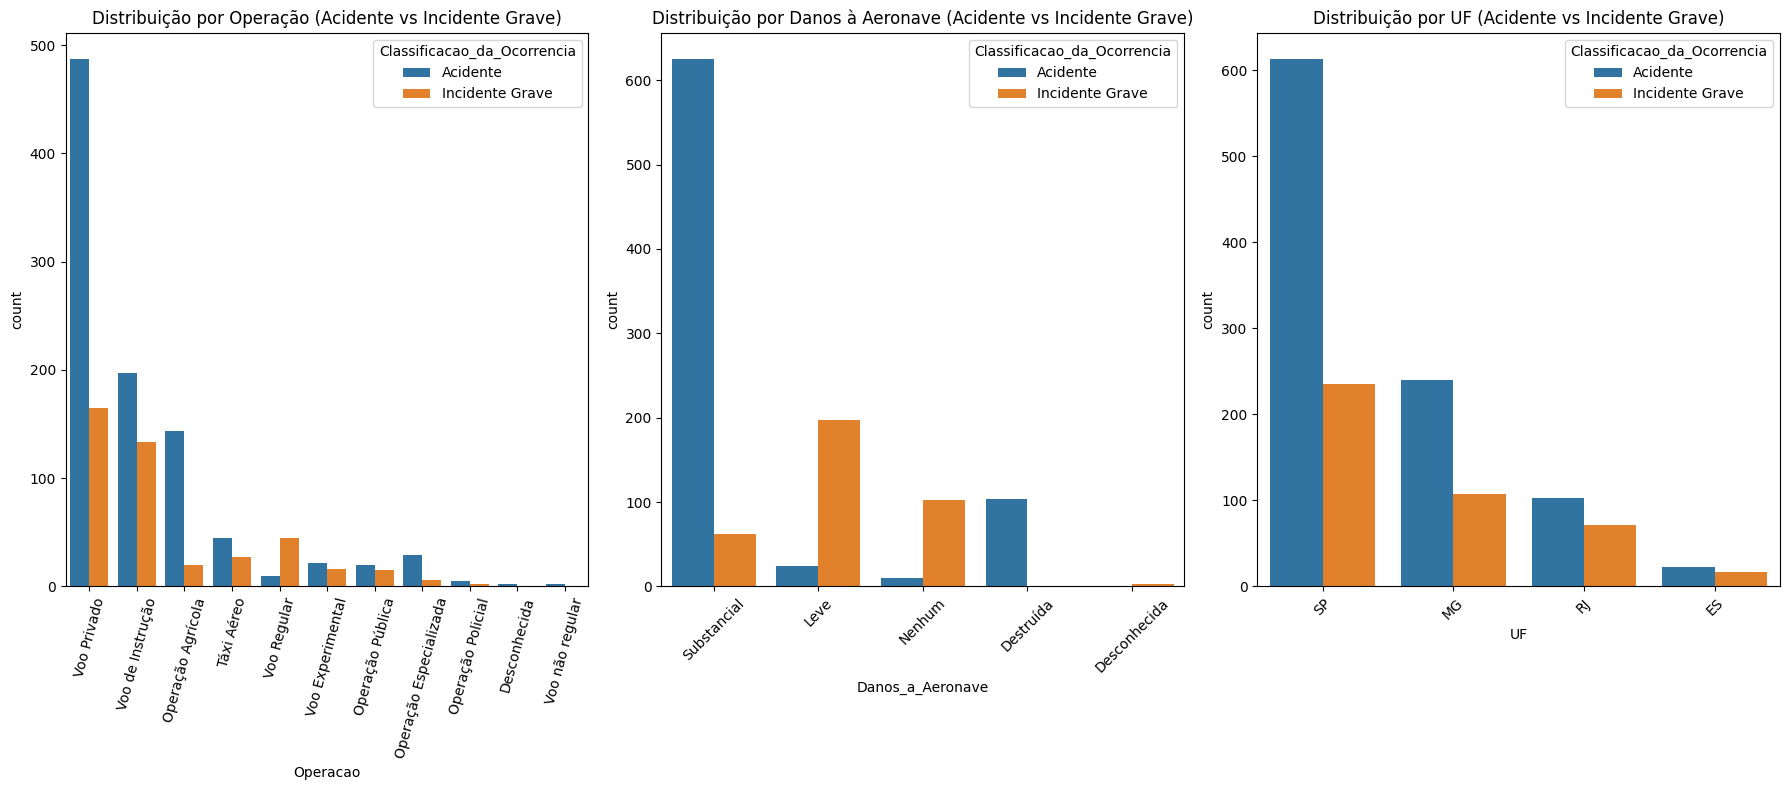

In [93]:
# Ordenando os valores únicos de "Classificacao_da_Ocorrencia" em ordem alfabética
hue_order = sorted(df_sudeste["Classificacao_da_Ocorrencia"].unique())

# Criando os subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Gráfico 1: Distribuição por Operação
sns.countplot(data=df_sudeste, x="Operacao", hue="Classificacao_da_Ocorrencia",
              ax=axes[0], order=df_sudeste["Operacao"].value_counts().index, hue_order=hue_order)
axes[0].set_title("Distribuição por Operação (Acidente vs Incidente Grave)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)

# Gráfico 2: Distribuição por Danos à Aeronave
sns.countplot(data=df_sudeste, x="Danos_a_Aeronave", hue="Classificacao_da_Ocorrencia",
              ax=axes[1], order=df_sudeste["Danos_a_Aeronave"].value_counts().index, hue_order=hue_order)
axes[1].set_title("Distribuição por Danos à Aeronave (Acidente vs Incidente Grave)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Gráfico 3: Distribuição por UF
sns.countplot(data=df_sudeste, x="UF", hue="Classificacao_da_Ocorrencia",
              ax=axes[2], order=df_sudeste["UF"].value_counts().index, hue_order=hue_order)
axes[2].set_title("Distribuição por UF (Acidente vs Incidente Grave)")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

# Ajustando layout
plt.tight_layout()
plt.show()

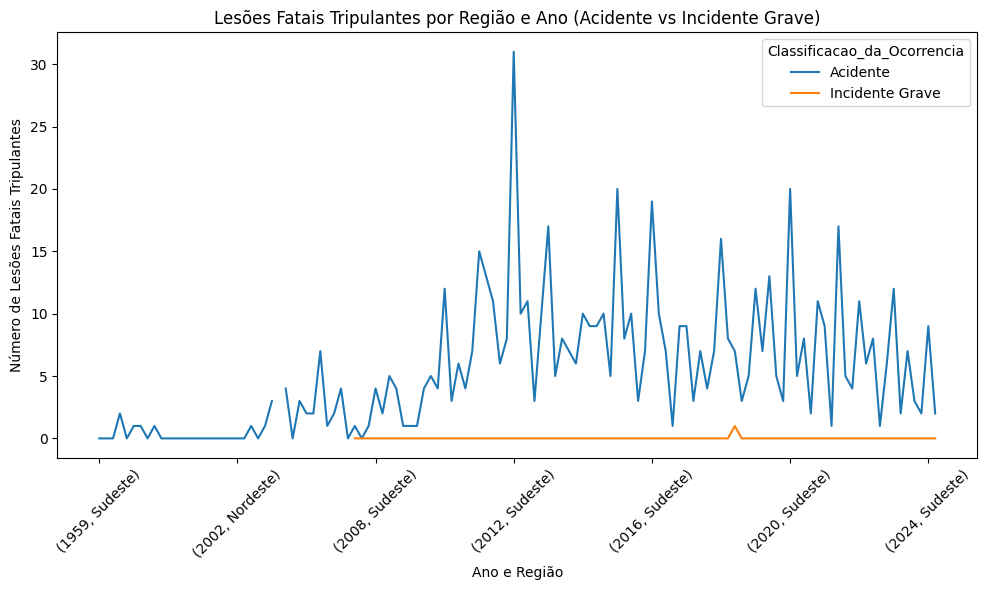

In [96]:
# Lista das colunas que queremos agrupar
numeric_columns = [
    "Lesoes_Fatais_Tripulantes", "Lesoes_Fatais_Passageiros", "Lesoes_Fatais_Terceiros",
    "Lesoes_Graves_Tripulantes", "Lesoes_Graves_Passageiros", "Lesoes_Graves_Terceiros",
    "Lesoes_Leves_Tripulantes", "Lesoes_Leves_Passageiros", "Lesoes_Leves_Terceiros",
    "Ilesos_Tripulantes", "Ilesos_Passageiros", "Lesoes_Desconhecidas_Tripulantes",
    "Lesoes_Desconhecidas_Passageiros", "Lesoes_Desconhecidas_Terceiros"
]

# Agrupar por 'Regiao', 'Ano_da_Ocorrencia', e 'Classificacao_da_Ocorrencia' e fazer a soma das colunas numéricas
grouped = df_raw_ocorrencias_aeronauticas.groupby(
    ['Regiao', 'Ano_da_Ocorrencia', 'Classificacao_da_Ocorrencia']
)[numeric_columns].sum()

# Resetando o index
grouped = grouped.reset_index()

# Plotagem do gráfico para análise
fig, ax = plt.subplots(figsize=(10, 6))

grouped.pivot_table(index=['Ano_da_Ocorrencia', 'Regiao'], columns='Classificacao_da_Ocorrencia', values='Lesoes_Fatais_Tripulantes').plot(ax=ax)

plt.title('Lesões Fatais Tripulantes por Região e Ano (Acidente vs Incidente Grave)')
plt.ylabel('Número de Lesões Fatais Tripulantes')
plt.xlabel('Ano e Região')
plt.xticks(rotation=45)

# Ajustando layout
plt.tight_layout()
plt.show()

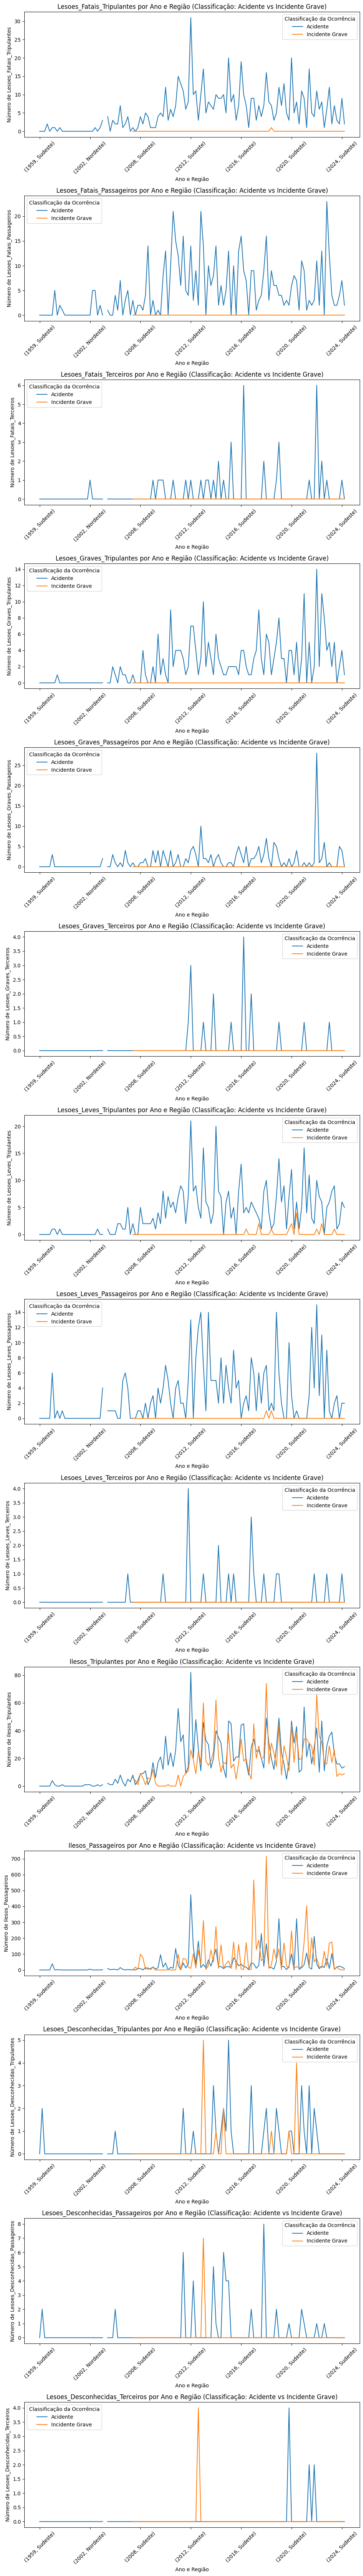

In [97]:
# Listando as colunas numéricas que queremos analisar
numeric_columns = [
    "Lesoes_Fatais_Tripulantes", "Lesoes_Fatais_Passageiros", "Lesoes_Fatais_Terceiros",
    "Lesoes_Graves_Tripulantes", "Lesoes_Graves_Passageiros", "Lesoes_Graves_Terceiros",
    "Lesoes_Leves_Tripulantes", "Lesoes_Leves_Passageiros", "Lesoes_Leves_Terceiros",
    "Ilesos_Tripulantes", "Ilesos_Passageiros", "Lesoes_Desconhecidas_Tripulantes",
    "Lesoes_Desconhecidas_Passageiros", "Lesoes_Desconhecidas_Terceiros"
]

def plot_numeric_columns(df, numeric_columns):
    # Agrupando os dados por 'Ano_da_Ocorrencia', 'Regiao', e 'Classificacao_da_Ocorrencia'
    grouped = df.groupby(
        ['Regiao', 'Ano_da_Ocorrencia', 'Classificacao_da_Ocorrencia']
    )[numeric_columns].sum().reset_index()

    # Criando subplots com os devidos tamanhos
    num_plots = len(numeric_columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    # Se houver apenas uma coluna, os eixos não serão uma lista, então vamos torná-los iteráveis.
    if num_plots == 1:
        axes = [axes]

    # Plotando cada coluna
    for i, col in enumerate(numeric_columns):
        ax = axes[i]
        # Pivot table para facilitar a plotagem
        pivoted_data = grouped.pivot_table(
            index=['Ano_da_Ocorrencia', 'Regiao'],
            columns='Classificacao_da_Ocorrencia',
            values=col
        )

        # Plotando os dados
        pivoted_data.plot(ax=ax)
        ax.set_title(f'{col} por Ano e Região (Classificação: Acidente vs Incidente Grave)')
        ax.set_xlabel('Ano e Região')
        ax.set_ylabel(f'Número de {col}')
        ax.legend(title='Classificação da Ocorrência')

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Evitando sobreposição
    plt.tight_layout()
    plt.show()

# Call the function to generate plots
plot_numeric_columns(df_raw_ocorrencias_aeronauticas, numeric_columns)